In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('final_processed_ml_dataset.csv')
print('Dimension of dataset= ', df.shape)
df.head() # To get first n rows from the dataset default value of n is 5

Dimension of dataset=  (1104, 6)


,Type,Floor Size(SQFT),Number of Rooms,Number of Bathroom,Cluster Label,Amount(BDT)
0,1,900,2,2,1,19000
1,1,900,2,2,1,19000
2,1,1610,3,4,1,50000
3,1,950,2,2,1,20000
4,1,1250,3,3,5,20000


In [3]:
# df = pd.read_csv('test_ml_dataset.csv')
# print('Dimension of dataset= ', df.shape)
# df.head() # To get first n rows from the dataset default value of n is 5

In [4]:
print(df.describe())

         Type  Floor Size(SQFT)  Number of Rooms  Number of Bathroom  \
count  1104.0       1104.000000      1104.000000         1104.000000   
mean      1.0       1652.146739         2.951087            2.967391   
std       0.0       1267.155717         1.131178            0.988981   
min       1.0        300.000000         1.000000            0.000000   
25%       1.0       1031.250000         3.000000            2.000000   
50%       1.0       1400.000000         3.000000            3.000000   
75%       1.0       2000.000000         3.000000            3.000000   
max       1.0      25900.000000        21.000000           10.000000   

       Cluster Label   Amount(BDT)  
count    1104.000000  1.104000e+03  
mean        3.890399  4.792518e+04  
std         2.953821  8.869862e+04  
min         0.000000  8.000000e+03  
25%         1.000000  1.800000e+04  
50%         3.000000  2.800000e+04  
75%         6.000000  5.062500e+04  
max         9.000000  2.100000e+06  


In [5]:
X = df.values[:, 0:5]  # get input values from first two columns
y = df.values[:, 5]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 1104 

X = [  1 900   2   2   1] , y = 19000
X = [  1 900   2   2   1] , y = 19000
X = [   1 1610    3    4    1] , y = 50000
X = [  1 950   2   2   1] , y = 20000
X = [   1 1250    3    3    5] , y = 20000


In [6]:
from sklearn.model_selection import train_test_split
seed = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=seed)

In [7]:
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X_train,y_train)
#model_ols.fit(X,y)
# fit() method is used for training the model
# Note the first parameter(feature) is must be 2D array(feature matrix)

D:\Projects\House_rent_prediction\venv\Scripts\env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [8]:
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [9]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [     0.             75.74182407   1482.8975883  -24857.05470487
    184.1476333 ]
intercept=  -8206.26371773857


In [10]:
predicted_rent = pd.DataFrame(model_ols.predict(X_test), columns=['Predicted Rent'])
actual_rent = pd.DataFrame(y_test)

In [11]:
predictedPrice = pd.DataFrame(model_ols.predict(X_test), columns=['Predicted Rent'])
# Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y_test, columns=['Actual Rent'])
actualPrice = actualPrice.reset_index(drop=True)
# Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
Actual Rent,107000.000000,75000.000000,21500.000000,18000.000000,30000.000000,55000.000000,30000.000000,25000.000000,33000.000000,20000.000000,...,11000.000000,305000.000000,25000.000000,60000.000000,18000.000000,20000.000000,35000.000000,24000.000000,80000.000000,17000.00000
Predicted Rent,176649.008616,96245.755567,10715.005944,27139.870583,35468.148675,104556.528508,40728.420946,27893.966268,22708.958115,9425.972511,...,-5169.949403,350981.840038,-6462.058007,55872.040781,13850.487253,13482.191987,13298.044353,32417.648005,50800.661123,14218.78252


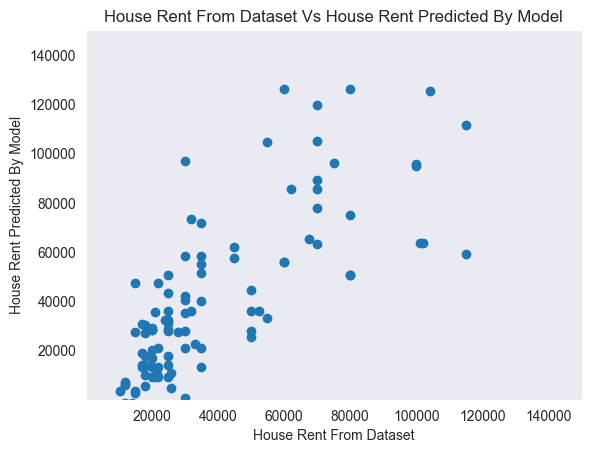

In [12]:
plt.scatter(y_test, model_ols.predict(X_test))
plt.xlabel('House Rent From Dataset')
plt.ylabel('House Rent Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("House Rent From Dataset Vs House Rent Predicted By Model")
plt.grid()
plt.xlim(100, 150000)
plt.ylim(100, 150000)
plt.show()

In [13]:
import sklearn.metrics as sm
y_test_pred = model_ols.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))
#print(model_ols.predict(X_test))

Mean absolute error = 18624.23
Mean squared error = 752520573.47
Median absolute error = 12312.76
Explain variance score = 0.7
R2 score = 0.69


In [14]:
'''Type,Lat,Lon,Floor_Size,Number_of_Rooms,Number_of_Bathroom'''
# create a model using coef and intercept
def calc(coef, intercept, input):
    print('coef: ', coef)
    print('intercept: ', intercept)
    pred = 0
    for i in range (len(coef)):
        pred = pred + coef[i]*input[i]
    pred =  pred + intercept
    return pred

#print(calc(model_ols.coef_, model_ols.intercept_, [1,23.874777,90.388188,900,2,2]))
print("Predicted rent: ", calc(model_ols.coef_, model_ols.intercept_, [1,900,2,2,1]), "Actual Rent: ", '19000')

coef:  [     0.             75.74182407   1482.8975883  -24857.05470487
    184.1476333 ]
intercept:  -8206.26371773857
Predicted rent:  13397.211348202123 Actual Rent:  19000
